In [1]:
import diptest
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Path to pancreas files
Run64_ROI12_expr = '~/Documents/Masterarbeit/data/Run64_Pankreas_ROI12_DATA/Run64_Pankreas_ROI12_EXPRESSION_cor.csv'

In [4]:
# select relevant marker
selced_marker = [
'CD45',  
'CD45RO',   
'CD3',
# CD2,
'CD4',
'CD8',    
'CD25-1',     
'FoxP3',
'CD152 CTLA4',   
#PD-L1
'CD19',     
'CD20 Cytoplasmic',
'CD38',     
'CD138', 
'CD69',    
'CD56',    
'CD314 NKG2D',     
'CD61',
'CD68', 
'CD206',     
'CD163',# IN ROI19 on tumor       
'CD11c', 
'CD123',
'CD15',    
'CD33',  
'CD117',   
'HLA-DR',
'Ki-67',     
'HNF-4-alpha',  
'Cytokeratin',    
'CD99',
'CD31',    
'CD105',    
'Podoplanin',
'SM Actin',
'Myosin SM',
'CollagenIII',
'CollagenIV',
'Fibronectin',
'Galectin9',    
]

In [5]:
# read data
raw_data = pd.read_csv(Run64_ROI12_expr, index_col="ID", sep='\t') 
raw_data = raw_data[selced_marker]

In [6]:
# compute arcsinh with various cofactors
results_summary = []
for i in raw_data:
    binom_res = []
    for j in range(1, 1000, 2):
        x = np.arcsinh(np.divide(raw_data[i], j))
        x = x.to_numpy()
        binom = diptest.dipstat(x)
        binom_res.append(binom)
        j += 1
    results_summary.append(binom_res)

df = pd.DataFrame(results_summary).T
df.columns = selced_marker
df

,CD45,CD45RO,CD3,CD4,CD8,CD25-1,FoxP3,CD152 CTLA4,CD19,CD20 Cytoplasmic,...,CD99,CD31,CD105,Podoplanin,SM Actin,Myosin SM,CollagenIII,CollagenIV,Fibronectin,Galectin9
0,0.007210,0.001521,0.001784,0.002227,0.006316,0.029947,0.001910,0.002795,0.002405,0.001978,...,0.002096,0.002072,0.002262,0.002618,0.004318,0.002426,0.009159,0.015629,0.002769,0.003036
1,0.007210,0.001521,0.001784,0.002227,0.006316,0.029950,0.001902,0.002795,0.002405,0.001978,...,0.002093,0.002072,0.002262,0.002618,0.004317,0.002426,0.009159,0.015627,0.002769,0.003032
2,0.007210,0.001521,0.001784,0.002227,0.006318,0.029956,0.001886,0.002796,0.002405,0.001977,...,0.002086,0.002073,0.002262,0.002618,0.004316,0.002426,0.009159,0.015623,0.002769,0.003024
3,0.007210,0.001521,0.001784,0.002227,0.006321,0.029965,0.001866,0.002797,0.002404,0.001977,...,0.002078,0.002074,0.002262,0.002618,0.004314,0.002426,0.009159,0.015616,0.002768,0.003012
4,0.007210,0.001521,0.001785,0.002227,0.006324,0.029977,0.001848,0.002798,0.002404,0.001977,...,0.002094,0.002075,0.002263,0.002618,0.004312,0.002426,0.009159,0.015607,0.002768,0.002996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.006944,0.002089,0.001781,0.001840,0.026683,0.033899,0.001808,0.003521,0.002360,0.002045,...,0.001990,0.001979,0.002370,0.002123,0.002236,0.002409,0.017333,0.001927,0.002548,0.002190
496,0.006943,0.002089,0.001781,0.001840,0.026622,0.033898,0.001808,0.003522,0.002360,0.002044,...,0.001990,0.001979,0.002370,0.002122,0.002235,0.002409,0.017355,0.001926,0.002548,0.002190
497,0.006942,0.002088,0.001781,0.001840,0.026562,0.033896,0.001808,0.003522,0.002360,0.002044,...,0.001990,0.001979,0.002370,0.002122,0.002235,0.002409,0.017377,0.001925,0.002548,0.002190
498,0.006941,0.002088,0.001781,0.001840,0.026502,0.033895,0.001808,0.003522,0.002361,0.002044,...,0.001990,0.001979,0.002370,0.002121,0.002235,0.002409,0.017399,0.001924,0.002548,0.002190


In [7]:
position_of_max = [] #position of maximum probability for every marker
for i in df:
    highest_prob = np.argmax(df[i])
    position_of_max.append(highest_prob)

In [8]:
# get for all marker the computation with the best cofactor
# Compute transformation with best cofactor
transfromed_opt_cofactor = []
count = 0
for item in raw_data:
    x = np.arcsinh(np.divide(raw_data[item], df[item][position_of_max[count]]))
    x = x.to_numpy()
    transfromed_opt_cofactor.append(x)
    count += 1   
    

df_tranformed = pd.DataFrame(transfromed_opt_cofactor).T
df_tranformed.columns = selced_marker

In [9]:
df_tranformed

,CD45,CD45RO,CD3,CD4,CD8,CD25-1,FoxP3,CD152 CTLA4,CD19,CD20 Cytoplasmic,...,CD99,CD31,CD105,Podoplanin,SM Actin,Myosin SM,CollagenIII,CollagenIV,Fibronectin,Galectin9
0,11.579986,11.703689,12.484887,12.285027,10.797790,8.459702,9.573152,10.710413,11.725722,12.150957,...,10.085313,11.459837,11.727422,13.308016,11.207440,11.453071,12.977465,10.636980,10.872115,9.646535
1,12.129812,12.007676,13.277794,12.141319,10.631243,8.515440,9.485270,10.770821,11.665997,12.119887,...,9.973652,11.383166,11.577185,13.016944,11.041401,11.307385,12.619710,10.408578,10.718779,9.581006
2,12.599824,12.309576,13.216902,13.095455,10.736884,8.623552,9.757289,10.787019,12.125263,12.608321,...,10.692328,11.925717,12.270579,13.631954,11.697484,12.020223,12.753768,12.616594,11.272623,10.392695
3,12.742197,12.276684,13.146515,12.904964,11.063149,8.624874,9.663819,10.819788,12.119197,12.659360,...,10.398057,11.945943,12.110804,13.492898,11.557077,11.895153,13.152095,12.214809,11.283372,10.241168
4,12.988317,11.934760,13.133265,12.193658,11.644602,8.564725,9.545480,10.862862,11.753114,12.224819,...,10.606481,11.377239,11.703804,13.271257,11.254373,11.442956,13.860982,10.924699,11.319891,9.666540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8786,12.192832,11.456040,12.225179,11.687248,12.573935,8.770476,9.776689,10.596156,11.569974,12.187537,...,9.938142,11.272087,11.556560,12.879493,12.183728,11.802581,14.923949,12.189450,11.726130,10.510899
8787,12.569497,11.777850,12.386639,12.133669,11.872097,8.771697,9.729252,10.495956,11.752343,12.337446,...,11.254413,11.458376,11.655675,13.536050,12.886423,12.397476,14.134657,12.502398,11.305756,10.297564
8788,12.292698,12.498830,13.409865,13.082931,12.649486,9.478339,10.105289,10.880541,12.616713,13.032046,...,10.940682,12.124870,12.135546,14.633279,12.678505,12.567319,14.968015,13.107192,12.213717,11.157170
8789,12.993671,11.740908,12.625903,12.444675,11.393924,8.924714,9.798657,10.608558,11.933932,12.521459,...,10.412198,11.593374,11.761302,14.154555,12.610371,12.369597,13.716682,12.566606,11.302071,10.249394


In [10]:
# compute trabsformation without specific cofactor
original_transformed = []
for marker in raw_data:
    x = np.arcsinh(raw_data[marker]).to_numpy()
    original_transformed.append(x)
    
original_transformed = pd.DataFrame(original_transformed).T
original_transformed.columns = selced_marker

### Results of Dip test
The dip statistic tells you the probability of the empirical distribution function being bimodal. By having a large value dip, the empirical data is more probable to have multiple modes

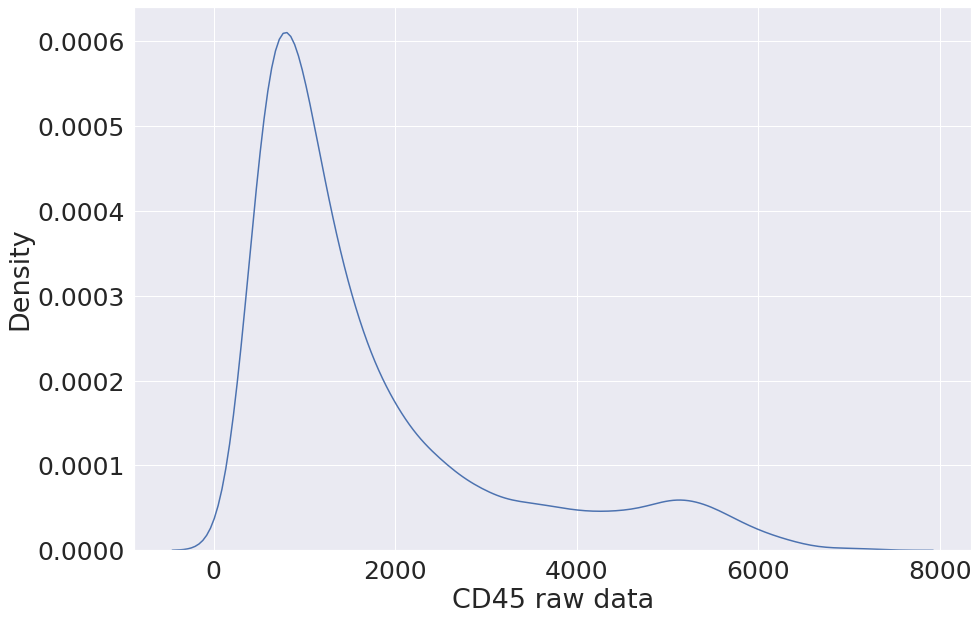

In [13]:
sns.set(rc={'figure.figsize':(15,10)})
g = sns.kdeplot(data = raw_data, x='CD45')
plt.xlabel('CD45 raw data', fontsize=27)
plt.ylabel('Density', fontsize=27)
g.tick_params(labelsize=25)
plt.savefig('results_subcluster_ROI12/CD45_density_raw_workflow.png') 

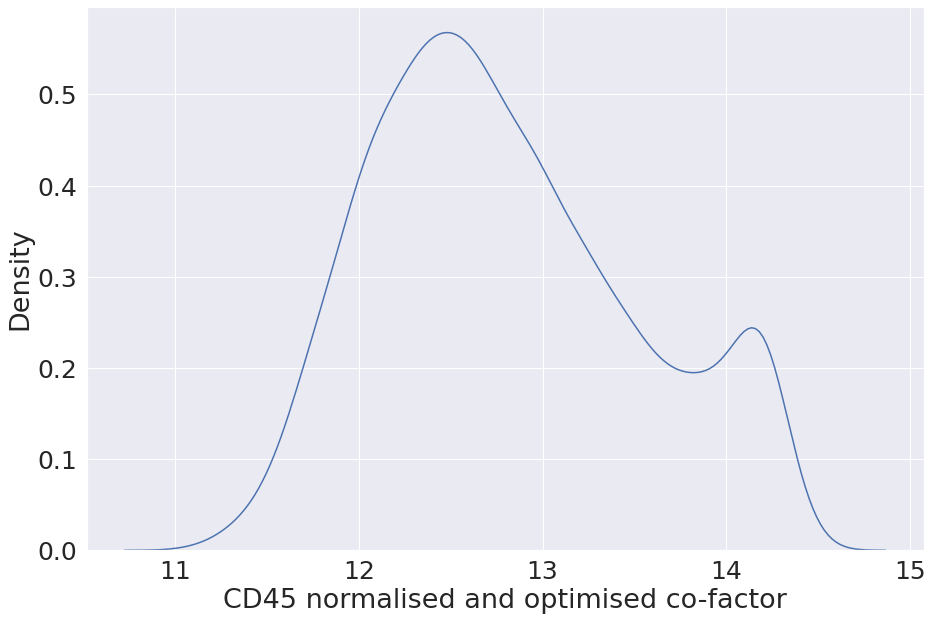

In [12]:
sns.set(rc={'figure.figsize':(15,10)})
g = sns.kdeplot(data = df_tranformed, x='CD45')
plt.xlabel('CD45 normalised and optimised co-factor', fontsize=27)
plt.ylabel('Density', fontsize=27)
g.tick_params(labelsize=25)
plt.savefig('results_subcluster_ROI12/CD45_density_optimised_workflow.png') 

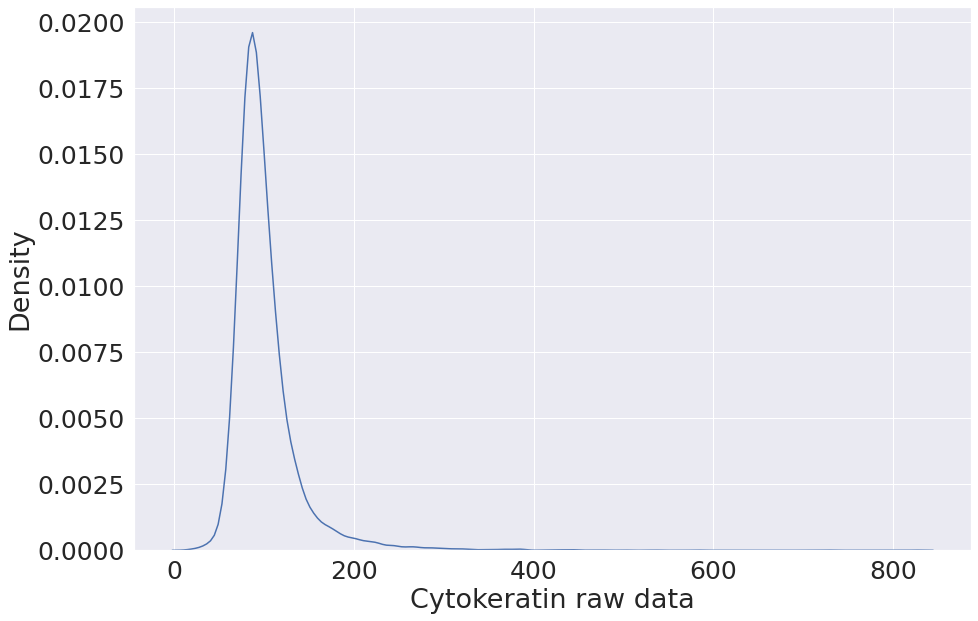

In [46]:
sns.set(rc={'figure.figsize':(15,10)})
g = sns.kdeplot(data = raw_data, x='Cytokeratin')
plt.xlabel('Cytokeratin raw data', fontsize=27)
plt.ylabel('Density', fontsize=27)
g.tick_params(labelsize=25)
plt.savefig('results_subcluster_ROI6/Cytokeratin_density_raw.pdf') 

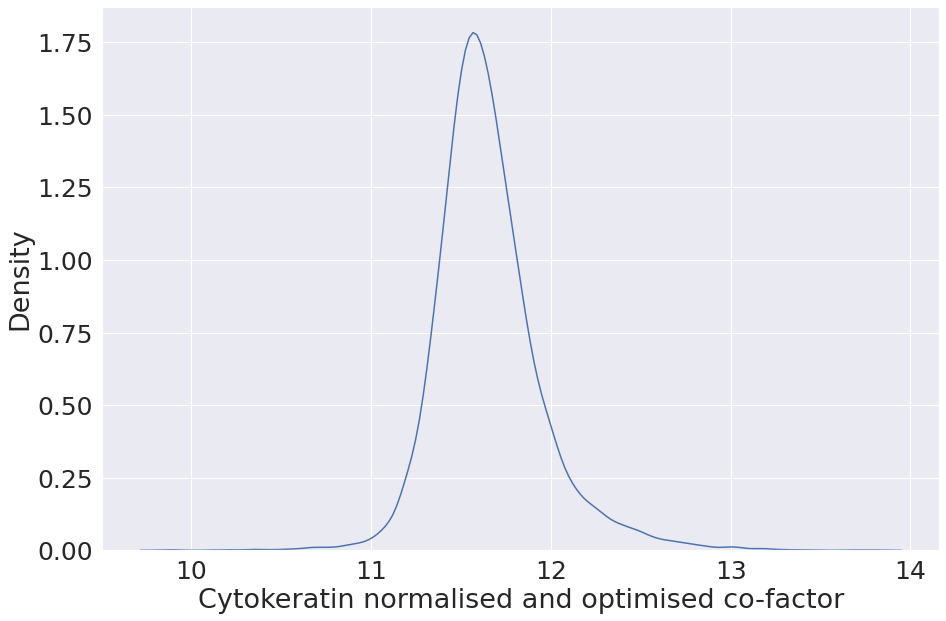

In [47]:
sns.set(rc={'figure.figsize':(15,10)})
g = sns.kdeplot(data = df_tranformed, x='Cytokeratin')
plt.xlabel('Cytokeratin normalised and optimised co-factor', fontsize=27)
plt.ylabel('Density', fontsize=27)
g.tick_params(labelsize=25)
plt.savefig('results_subcluster_ROI6/Cytokeratin_density_optimised.pdf') 

In [ ]:
# y-axis in a density plot is the probability density function for the kernel density estimation.
sns.set(rc={'figure.figsize':(20,10)})
fig, axes = plt.subplots(ncols=2, nrows=1)

sns.kdeplot(data = raw_data, x='CD45', ax = axes[0])
plt.xlabel('CD45 raw data', fontsize=12)

#sns.kdeplot(data = original_transformed, x = 'CD45', ax = axes[1])

sns.kdeplot(data = df_tranformed, x='CD45', ax = axes[1])
plt.xlabel('CD45 normalised and optimised co-factor', fontsize=12)

fig.figure.suptitle("ROI6 ", fontsize = 18)
fig.savefig('results_subcluster_ROI6/density.pdf') 

In [ ]:
counter = 1
for marker in raw_data:
    # y-axis in a density plot is the probability density function for the kernel density estimation.
    sns.set(rc={'figure.figsize':(15,10)})
    fig, axes = plt.subplots(ncols=3, nrows=1)

    sns.kdeplot(data = raw_data, x = marker, ax = axes[0])
    sns.kdeplot(data = original_transformed, x = marker, ax = axes[1])
    sns.kdeplot(data = df_tranformed, x = marker,  ax = axes[2])
    fig.savefig(str(counter) + "density.pdf") 
    counter += 1